IMPORTING LIBRARIES

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

LOADING DATA

In [3]:
mdata=pd.read_csv('movies.dat', sep = '::', engine='python',encoding="latin-1")
mdata

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [10]:
mdata.columns =['MovieIDs','MovieName','Category']
mdata.dropna(inplace=True)
mdata.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [12]:
rdata = pd.read_csv("ratings[1].dat",sep='::', engine='python')
rdata

,916,2717,4,957459853
0,5916,3375,3,957460390
1,5916,2719,1,957459914
2,5916,1779,2,957460621
3,5916,164,3,957460823
4,5916,165,3,957461345
...,...,...,...,...
19267,6040,1091,1,956716541
19268,6040,1094,5,956704887
19269,6040,562,5,956704746
19270,6040,1096,4,956715648


In [13]:
rdata.columns =['ID','MovieID','Ratings','TimeStamp']
rdata.dropna(inplace=True)
rdata.head()

,ID,MovieID,Ratings,TimeStamp
0,5916,3375,3,957460390
1,5916,2719,1,957459914
2,5916,1779,2,957460621
3,5916,164,3,957460823
4,5916,165,3,957461345


In [28]:
udata = pd.read_csv("users.dat",sep='::',engine='python')

In [29]:
udata

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [30]:
udata.columns =['UserID','Gender','Age','Occupation','Zip-code']
udata.dropna(inplace=True)
udata.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


MERGE DATASETS

In [31]:
data = pd.concat([mdata,rdata,udata], axis=1)
data.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,5916,3375,3,957460390,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,5916,2719,1,957459914,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,5916,1779,2,957460621,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,5916,164,3,957460823,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,5916,165,3,957461345,6.0,F,50.0,9.0,55117


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19272 entries, 0 to 19271
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MovieIDs    3882 non-null   float64
 1   MovieName   3882 non-null   object 
 2   Category    3882 non-null   object 
 3   ID          19272 non-null  int64  
 4   MovieID     19272 non-null  int64  
 5   Ratings     19272 non-null  int64  
 6   TimeStamp   19272 non-null  int64  
 7   UserID      6039 non-null   float64
 8   Gender      6039 non-null   object 
 9   Age         6039 non-null   float64
 10  Occupation  6039 non-null   float64
 11  Zip-code    6039 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 1.5+ MB


DATA PREPROCESSING

In [60]:
data.isnull().sum()

MovieIDs      15390
MovieName     15390
Category      15390
ID                0
MovieID           0
Ratings           0
TimeStamp         0
UserID        13233
Gender        13233
Age           13233
Occupation    13233
Zip-code      13233
dtype: int64

SPLITING FOR TESTING

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
first_500 = data[500:]
first_500.dropna(inplace=True)

<ipython-input-33-83e1de577df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [34]:
features = first_500[['MovieID','Age','Occupation']].values

In [35]:
labels = first_500[['Ratings']].values

In [36]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Evaluate the model's performance:

In [45]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


35.67

In [43]:
svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35.67

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt= DecisionTreeClassifier()
dt.fit(train, train_labels)
Y_pred = dt.predict(test)
acc_dt = round(dt.score(train, train_labels) * 100, 2)
acc_dt

98.1

In [54]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','Decision Tree'],
    'Score': [ acc_log,acc_svc, acc_dt]})
models.sort_values(by='Score', ascending=True)

,Model,Score
0,Logistic Regression,35.67
1,Support Vector Machines,35.67
2,Decision Tree,98.10


DATA VISUALIZATION

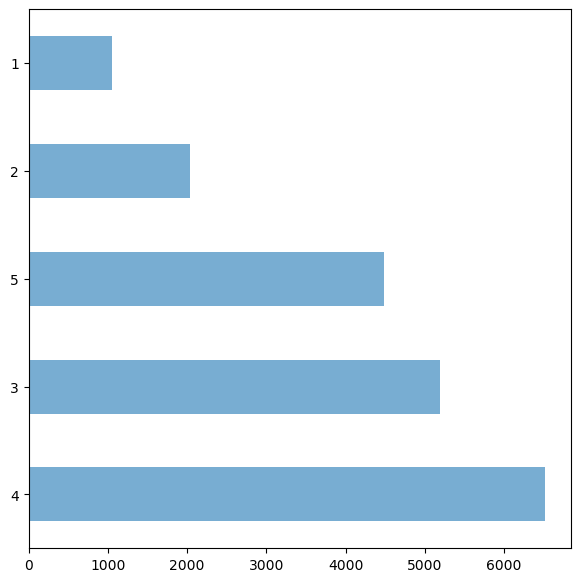

In [55]:
data['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()


Text(0.5, 0, 'Age')

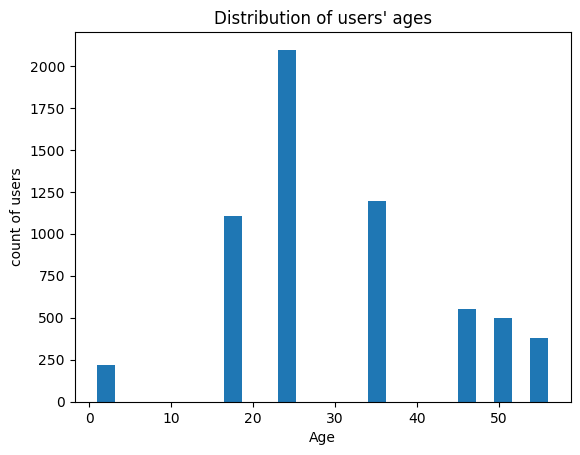

In [57]:
data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')